Follow this guide to select the correct conda environment\
https://stackoverflow.com/questions/66869413/visual-studio-code-does-not-detect-virtual-environments

In [60]:
import os
os.environ['NUMEXPR_MAX_THREADS'] = '128'

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
#print(sys.executable)
from importlib import reload

import collections
import os
import subprocess
import numpy as np

import confidence.confidence_tools as confidence_tools

from IPython import display
from collections import defaultdict
import py3Dmol
import pandas as pd
#pd.set_option('display.max_columns', None)

# import drawing library
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
# CHANGE
id="8av2"
model=(4,2)
prediction=(29,2)
preset="alphafold3"

id="8av2"
model=(1,1)
prediction=(24,2)
preset="alphafold3"

id="8av2"
model=(1,1)
prediction=(22,2)
preset="alphafold3"

In [63]:
# Software
MMalign_exe="/home/sfromm/programs/MMalign/MMalign"

# Directories
tmp = "/home/sfromm/tmp"
native_pdb = f"/home/sfromm/git/abag-benchmark-set/data/db/structures_filtered/{id}_filtered.pdb"
path_scores = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/scores.csv"
all_scores = f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/scores_{preset}.csv"

#f"/home/sfromm/git/abag-benchmark-set/data/scores_ae/{preset}/output/{id}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}/{id}_model_{model}_multimer_v3_pred_{prediction}_{preset}_merged.csv"


# Parameters
data1 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/full_confidences_seed_{prediction[0]}_sample_{model[0]}_{preset}.json"
data2 = f"/mnt/sdb/users/sfromm/benchmarking-data/models/{preset}/{id}complex/full_confidences_seed_{prediction[1]}_sample_{model[1]}_{preset}.json"




In [64]:
df = pd.read_csv(path_scores, sep=',')
#df = pd.read_csv(all_scores, sep=',')
#df = df.sample(n=356, random_state=42)  # Set random_state for reproducibility

# df = df[df["model"] == "model_1_"]
# df = df[df["abag_dockq"] >= 0.3]
# df.head()

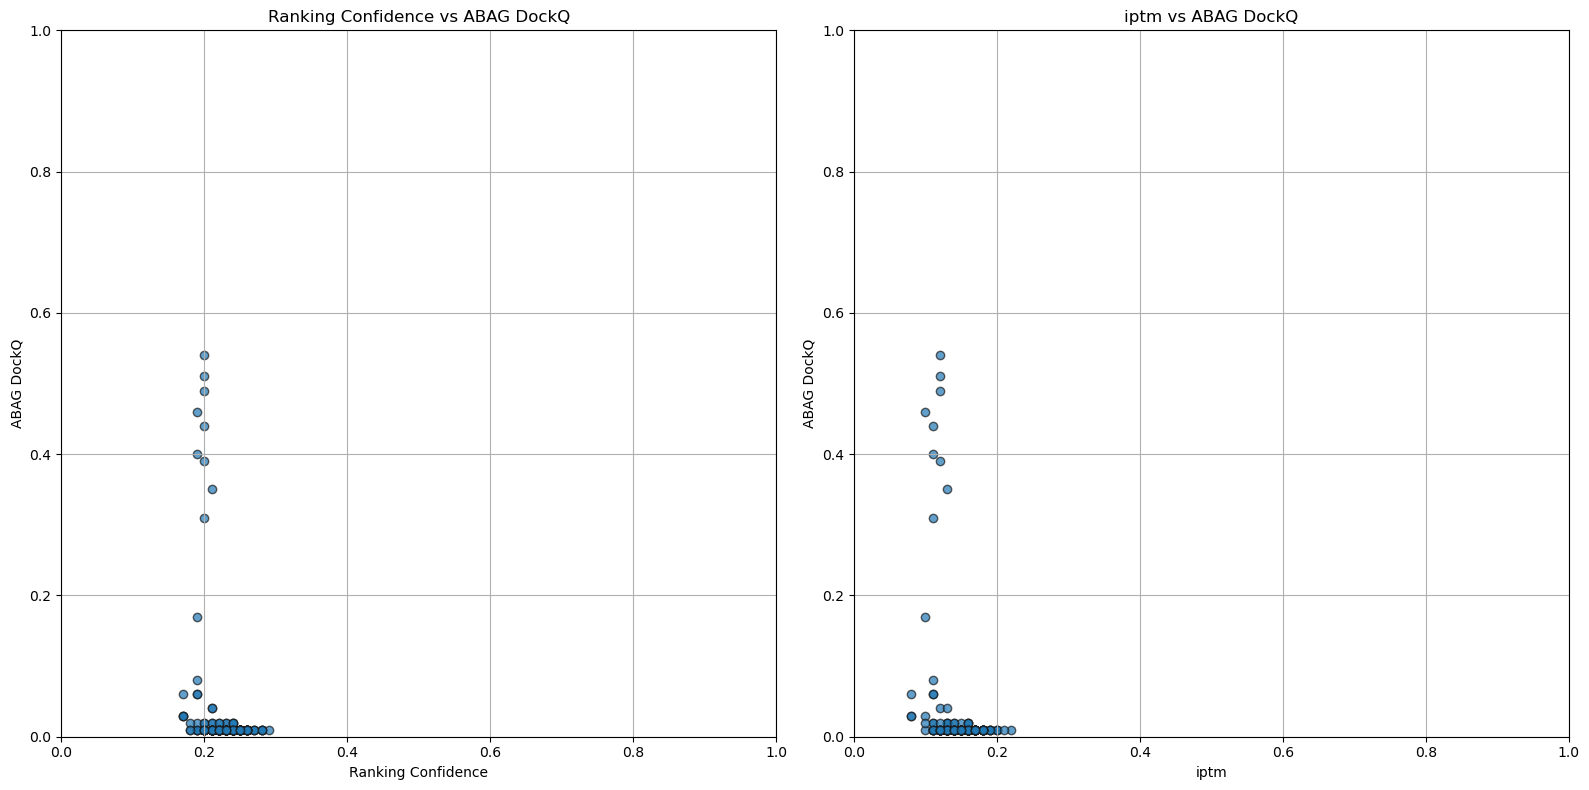

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows where ranking_confidence, custom_score, or abag_dockq is NaN
#df = df.dropna(subset=["ranking_confidence", "custom_score", "abag_dockq"])


# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot ranking_confidence vs abag_dockq
axes[0].scatter(df["ranking_confidence"], df["abag_dockq"], alpha=0.7, edgecolors='k')
axes[0].set_xlabel("Ranking Confidence")
axes[0].set_ylabel("ABAG DockQ")
axes[0].set_title("Ranking Confidence vs ABAG DockQ")
axes[0].set_xlim(0,1)
axes[0].set_ylim(0, 1)
axes[0].grid(True)

# Plot custom_score vs abag_dockq
axes[1].scatter(df["iptm"], df["abag_dockq"], alpha=0.7, edgecolors='k')
axes[1].set_xlabel("iptm")
axes[1].set_ylabel("ABAG DockQ")
axes[1].set_title("iptm vs ABAG DockQ")
axes[1].set_xlim(0,1)
axes[1].set_ylim(0, 1)
axes[1].grid(True)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()


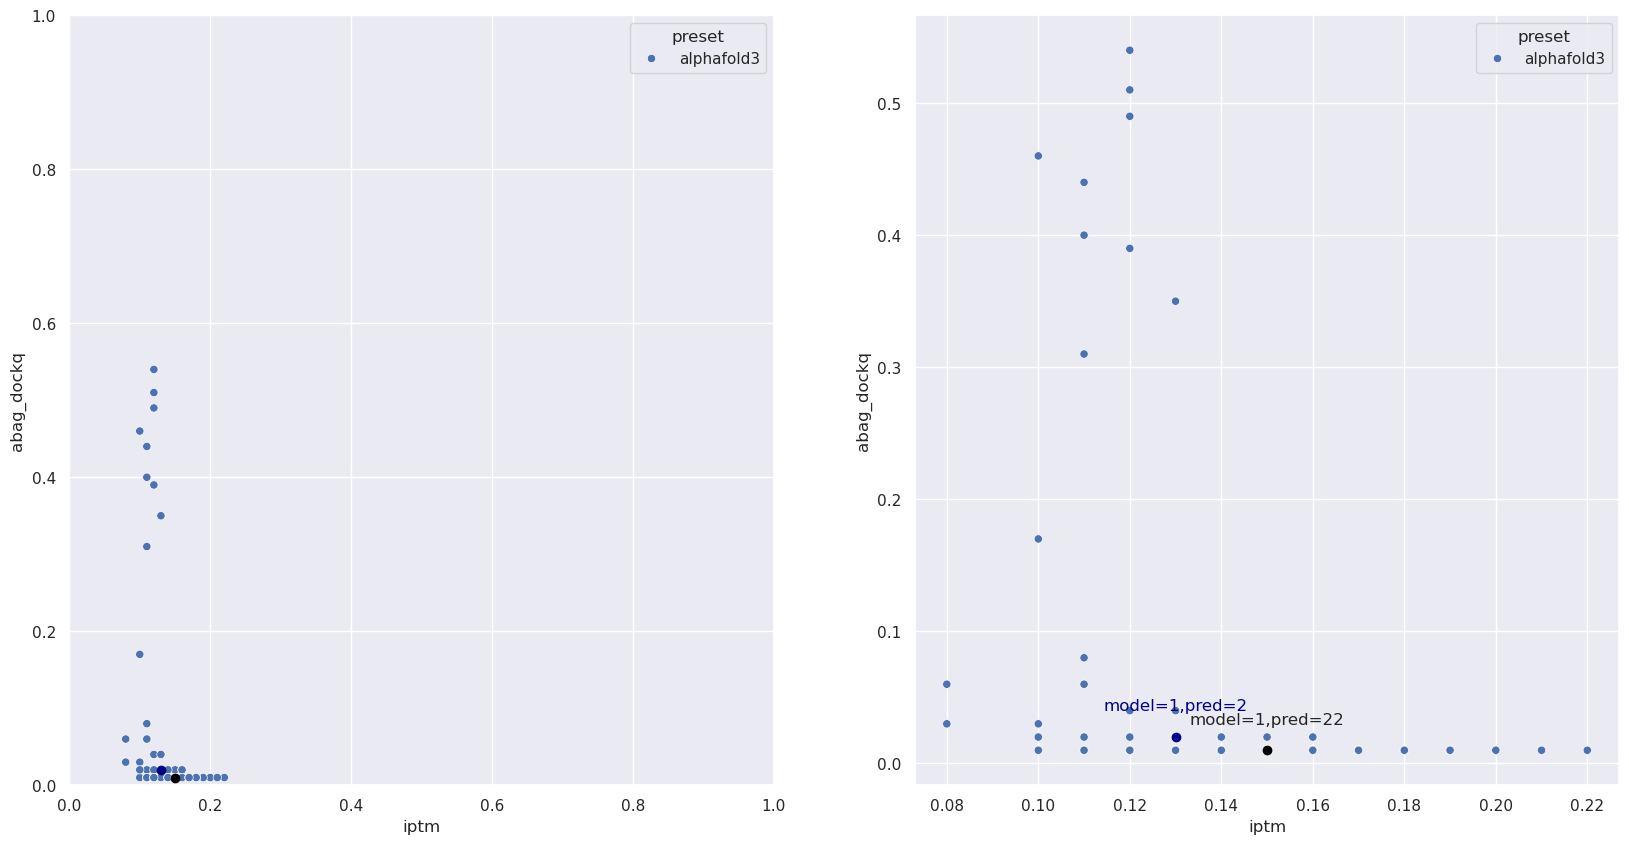

Selected model 1: 122
Selected model 2: 12


In [66]:
df_scores = df
# Set style
sns.set_theme()

n_x_axis=2
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*10, 1*10))


x1=df_scores[(df_scores['model']==f"model_{model[0]}_") & (df_scores['prediction']==prediction[0]) ].iloc[0]['iptm']
y1=df_scores[(df_scores['model']==f"model_{model[0]}_") & (df_scores['prediction']==prediction[0]) ].iloc[0]['abag_dockq']
x2=df_scores[(df_scores['model']==f"model_{model[1]}_") & (df_scores['prediction']==prediction[1]) ].iloc[0]['iptm']
y2=df_scores[(df_scores['model']==f"model_{model[1]}_") & (df_scores['prediction']==prediction[1]) ].iloc[0]['abag_dockq']

# First axes
ax=axes[0]
ax.set_xlim((0,1))
ax.set_ylim((0,1))
sns.scatterplot(ax=ax, data=df_scores,x='iptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')

# Second axes
ax = axes[1]
sns.scatterplot(ax=ax, data=df_scores,x='iptm',y='abag_dockq', hue='preset', style='preset')
ax.scatter(x1, y1, color = 'black')
ax.scatter(x2, y2, color = 'darkblue')
ax.text(x1, y1+0.02, f"model={model[0]},pred={prediction[0]}", ha='center')
ax.text(x2, y2+0.02, f"model={model[1]},pred={prediction[1]}", ha='center', color='darkblue')

plt.show()
plt.close()
print('\n'.join([f"Selected model {i+1}: {model[i]}{prediction[i]}" for i in [0,1]]))


In [67]:
import json
def load_data(pkl_path: str):
    """Load data from pickle file."""
    with open(pkl_path, "rb") as p:
        data = json.load(p)
    return data


In [68]:
pkl1_data = load_data(data1)
pkl2_data = load_data(data2)


pae1=np.array(pkl1_data['pae'])
pae2=np.array(pkl2_data['pae'])

# plddt_1=pkl1_data['plddt']
# plddt_2=pkl2_data['plddt']


In [69]:
# my jupyter notebook keeps crashing, maybe because of too large a variable? no idea
try:
    del pkl1_data
except:
    pass
try:
    del pkl2_data
except:
    pass


In [70]:
import matplotlib.colors as mcolors

# Some functions for drawing
plt.style.use('default')
def plot_matrix(
    mat1, mat2, filepath=None, limits1=None, limits2=None, name1="mat1", name2="mat2", title=None, figsize=7,
):

    color_map = "seismic" #"viridis"

    plot_objects = [mat1, mat2]
    limits = [limits1,limits2]
    titles = [name1,name2]
    if mat1.shape == mat2.shape:
        plot_objects.append(mat1-mat2)
        titles.append(f"{name1} - {name2}")
        if limits1==limits2:
            limits.append(limits1)
        else:
            limits.append(None)

    n_x_axis = len(plot_objects)
    fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * figsize, 1 * figsize))
    for i in range(n_x_axis):

        mat = plot_objects[i]
        # Compute color normalization centered at zero
        vmin, vmax = np.min(mat), np.max(mat)
        if vmin < 0 and vmax > 0:
            norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
            p = axes[i].imshow(mat, cmap=color_map, norm=norm)
        else:
            p = axes[i].imshow(plot_objects[i], cmap=color_map)
        plt.colorbar(p, ax=axes[i], fraction=0.046, pad=0.05)
        if limits[i] is not None:
            for limit in limits[i]:
                # horizontal line
                axes[i].plot([0,plot_objects[i].shape[0]-1], [limit,limit], color="red", linewidth=2) 
                # vertical line
                axes[i].plot([limit,limit], [0,plot_objects[i].shape[1]-1], color="red", linewidth=2) 
        axes[i].title.set_text(titles[i])

    if title is not None:
        fig.suptitle(title, fontsize=30)

    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()
    plt.close()
    return


def plot_vec(
    vec1, vec2,filepath=None,  limits=None, name1="vec1", name2="vec2",title=None,
):
    l = vec1.shape[0]
    assert l == vec2.shape[0]
    X = np.arange(l)

    # Figure Size

    n_x_axis = 2
    fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis * 7, 1 * 7))

    # vec1 and vec2
    i=0
    axes[i].bar(X + 0.00, vec1, color="blue", alpha=1, width=1)
    axes[i].bar(X + 0.00, vec2, color="green", alpha = 0.5, width=1)
    axes[i].legend(labels=[name1,name2])
    #axes[i].set_ylim((0,1))

    # difference
    i=1
    axes[i].bar(X + 0.00, vec1-vec2, color="blue", width=1)
    axes[i].legend(labels=[f"{name1}-{name2}"])


    for i in [0,1]:
        if limits is not None:
            for limit in limits:

                ax00 = axes[i].twinx()
                # Plot a line
                ax00.axvline(x=limit, color="r")

                ax00.annotate(
                    f"{limit}",
                    xy=(limit, 0),
                    xytext=(limit, -0.1),
                    arrowprops=dict(facecolor="black", shrink=0.05),
                )


    if filepath is not None:
        plt.savefig(filepath, dpi=600)
    else:
        plt.show()
    plt.close()
    return

def get_chain_limits(asym_id):
    chain_limits = []
    chain_ids = asym_id.astype("int")
    for i in range(chain_ids[-1]):
        #chain_starts = np.where(chain_ids == i + 1)[0][0] + 1
        chain_stops = np.where(chain_ids == i + 1)[0][-1] + 1
        chain_limits.append(chain_stops - 1)
    chain_limits.pop()
    if chain_limits == []:
        return None
    return chain_limits

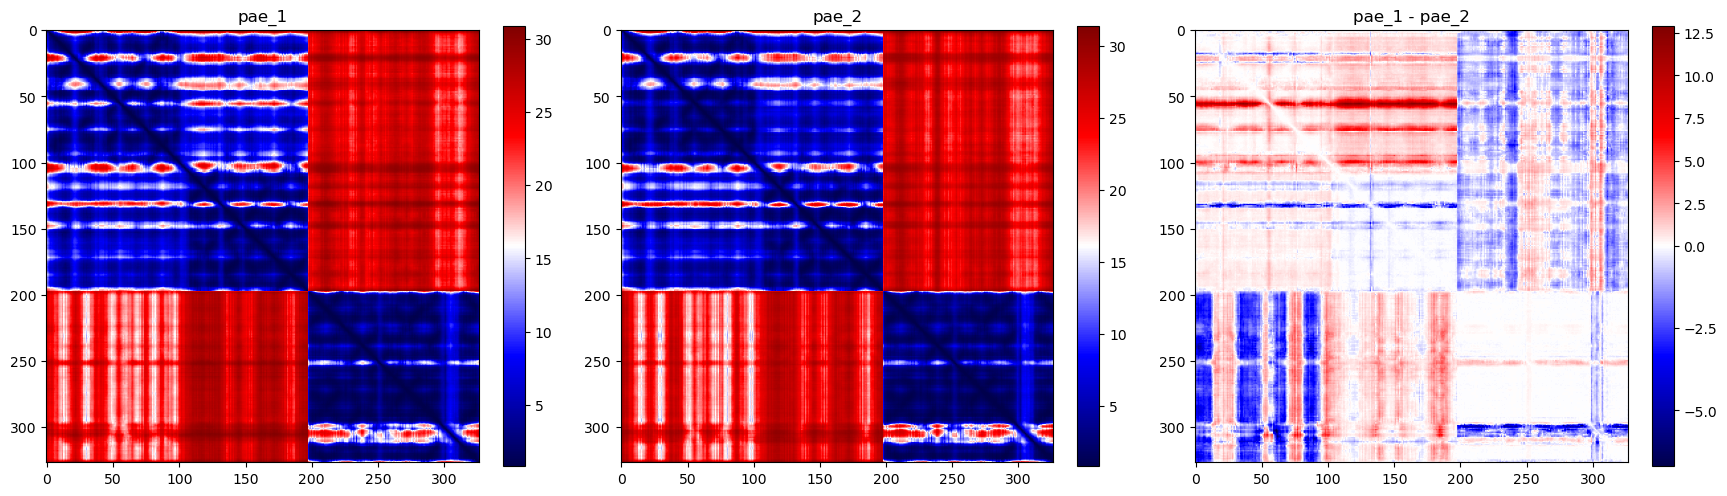

In [71]:

plot_matrix(
    mat1=pae1,
    mat2=pae2,
    name1='pae_1',
    name2='pae_2',
    #limits1=get_chain_limits(asym_id_1),
    #limits2=get_chain_limits(asym_id_2),
    #title="Predicted Aligned Error"
)

# plot_matrix(
#     mat1=predicted_tm_terms_1,
#     mat2=predicted_tm_terms_2,
#     name1='predicted_tm_terms_1',
#     name2='predicted_tm_terms_2',
#     #limits1=get_chain_limits(asym_id_1),
#     #limits2=get_chain_limits(asym_id_2),
#     #title="Predicted TM Terms"
# )

In [72]:
print(f"mean: {(pae1-pae2).mean()}")
print(f"max: {(pae1-pae2).max()}")
print(f"min: {(pae1-pae2).min()}")

mean: 0.2178510974571912
max: 12.9
min: -6.699999999999999
